# Final Replication Notebook
### Los Angeles County Displacement Typologies and LEHD Data on Employment Trends near Joint Development Sites
#### Anna C. Driscoll, 5/8/2020

For my CP255 semester project, I explored displacement pressures and access to opportunity on sites being developed through the Los Angeles Metro joint development program. Transit agencies across the nation are undertaking joint development (JD) projects, leveraging their public land in station areas to facilitate housing, retail, and other development near transit. Despite the benefits of these developments, JD can also lead to transit-oriented displacement, counterintuitively and inequitably replacing a lower-income, transit-dependent population with higher-income residents less likely to take the transit they live so close to. 

### This analysis explores the following research questions:

### 1) What is the landscape of displacement pressure surrounding completed, active, and potential future sites of LA Metro joint development?

### 2) How have completed joint developments shaped access to economic opportunity in their neighborhoods?

This  focus on displacement and access to opportunity in JD fills an important research gap and has broader implications for the role of transit agencies in affordable housing and community development. 

I collaborated with research staff at the Urban Displacement Project to create new tract-level displacement typology maps of Los Angeles County in Python. Using CARTO, I then overlaid them with spatial data from LA Metro on current, active, and future opportunity sites for their JD projects. This overlay enabled a descriptive analysis of the neighborhood change status of Census tracts that contain JD projects at varying stages of completion. 

Next, I incorporated data from the Longitudinal Employer-Household Dynamics (LEHD) dataset via the OnTheMap platform available from the US Census. OnTheMap enables users to hone in on very small areas to explore data on residents’ or workers’ job types, commute patterns, and earnings within that geography. I drew 0.1-mile buffers around my dataset of completed Metro JD projects, plotted them on my typology map in Python, and compared the worker characteristics of job-holders within this set of 0.1-mile buffers, their surrounding Census tracts, and LA County as a whole. This analysis added nuance to my displacement typology analysis at the tract level by zooming in on the JD sites themselves and assessing the landscape of employment opportunities that JD can offer to residents. 

### This final notebook replicates each component of my analysis, including links to work produced in CARTO. I welcome any questions at anna_driscoll@berkeley.edu. Enjoy!

# Part I. Displacement Typologies

I collaborated with researchers at the Urban Displacement Project to adjust their existing 4-notebook process for creating tract-level typologies in Python so that the methodology would generate a new typology CSV for tracts in Los Angeles County. These notebooks, numbered 1 through 4, are included in my GitHub release and can be referenced there.

This section replicates my descriptive analysis of the resulting typology data for Census tracts across LA County and my preliminary visualizations of this data overlaid with the locations of completed JD projects. 

## A more detailed, interactive map in CARTO can be found at https://tinyurl.com/wxlpdnc.

## 1.1  Preliminary Typology Analysis

### The neighborhood change typology designations are as follows:

Gentrification & Displacement:

    OD = Ongoing Displacement of Low-Income Households
    SLI = Not Currently at Risk of Gentrification
    ARG = At Risk of Gentrification
    EOG = Early/Ongoing Gentrification
    AdvG = Advanced Gentrification

Exclusion:

    SMMI = Stable Moderate/Mixed-Income
    ARE = At Risk of Exclusion
    BE = Becoming Exclusive
    SAE = Stable/Advanced Exclusive

    [] = Data Unavailable

In [1]:
#libraries

import pandas as pd
import seaborn as sns
sns.set() 

In [2]:
#Load LA displacement typology CSV (output from the 4 UDP notebooks)
typologies = pd.read_csv('Los Angeles_typology_output.csv')

/srv/app/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (208,209) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Preliminary data exploration in Python:

len(typologies)

2339

In [4]:
typologies.describe()

,Unnamed: 0,GEOID_x,pop_17,white_17,hh_17,hinc_17,mhval_17,mhval_17_se,mrent_17,mrent_17_se,...,ARE,BE,SMMI,ARG,EOG,OD,OD_loss,SLI,double_counted,typology
count,2339.000000,2.339000e+03,2339.000000,2339.000000,2339.000000,2304.000000,2.339000e+03,2.339000e+03,2.339000e+03,2.339000e+03,...,2339.000000,2297.000000,2339.000000,2339.000000,2311.000000,2339.000000,2339.000000,2339.000000,2334.000000,2290.000000
mean,1169.000000,6.037407e+09,4316.819581,1142.437794,1407.486105,66196.767795,-2.512383e+07,-1.205516e+07,-1.253952e+07,-6.032779e+06,...,0.165455,0.037005,0.265926,0.006413,0.016876,0.023942,0.032920,0.287302,0.981148,5.145852
std,675.355462,2.270771e+05,1558.188377,1186.188319,605.692434,32499.201247,1.283649e+08,5.425568e+07,9.059204e+07,3.886850e+07,...,0.371670,0.188815,0.441919,0.079841,0.128834,0.152901,0.178466,0.452601,0.136030,3.005259
min,0.000000,6.037101e+09,0.000000,0.000000,0.000000,5682.000000,-6.666667e+08,-3.333333e+08,-6.666667e+08,-3.333333e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,584.500000,6.037211e+09,3250.000000,182.500000,1012.000000,41766.000000,3.520500e+05,2.391000e+04,1.130000e+03,7.800000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1169.000000,6.037405e+09,4213.000000,682.000000,1327.000000,59363.500000,4.431000e+05,3.788300e+04,1.321000e+03,1.190000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
75%,1753.500000,6.037552e+09,5306.500000,1824.000000,1733.000000,82116.000000,6.218000e+05,6.322050e+04,1.687000e+03,2.050000e+02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,7.000000
max,2338.000000,6.037980e+09,12653.000000,6751.000000,5523.000000,250001.000000,2.000001e+06,7.425670e+05,3.501000e+03,2.560000e+03,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [5]:
typologies.head()
#typ_cat, the column all the way to the right, shows the typology designation for each tract.

,Unnamed: 0,GEOID_x,pop_17,white_17,hh_17,hinc_17,mhval_17,mhval_17_se,mrent_17,mrent_17_se,...,BE,SMMI,ARG,EOG,OD,OD_loss,SLI,double_counted,typology,typ_cat
0,0,6037101210,6043,2488,2330,34627.0,360600,51082,1174,61,...,0.0,0,0,0.0,0,0,1,1.0,1.0,['SLI']
1,1,6037102103,1838,1347,689,81477.0,538800,49634,2160,159,...,0.0,0,0,0.0,0,0,0,1.0,9.0,['SAE']
2,2,6037104105,5887,429,1611,39693.0,288400,47330,731,66,...,0.0,0,0,0.0,0,0,1,1.0,1.0,['SLI']
3,3,6037104404,3046,33,624,54242.0,349300,20213,1399,115,...,0.0,1,0,0.0,0,0,0,1.0,6.0,['SMMI']
4,4,6037104810,5806,249,1028,68250.0,345800,17784,1510,233,...,1.0,0,0,0.0,0,0,0,1.0,8.0,['BE']


In [6]:
#grouping by typ_cat typology categories:
typologies.groupby('typ_cat').describe()

ARE                                       ARG          ...       \
          count mean  std  min  25%  50%  75%  max  count mean     ...        
typ_cat                                                            ...        
['ARE']   387.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  387.0  0.0     ...        
['ARG']    15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   15.0  1.0     ...        
['AdvG']   12.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   12.0  0.0     ...        
['BE']     85.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   85.0  0.0     ...        
['EOG']    39.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   39.0  0.0     ...        
['OD']     56.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   56.0  0.0     ...        
['SAE']   402.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  402.0  0.0     ...        
['SLI']   672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  672.0  0.0     ...        
['SMMI']  622.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  622.0  0.0     ...        
[]         49.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   49.0  0.0     ...        

         white_17         white_90                                        \
              75%     max    count         mean          std         min   
typ_cat                                                                    
['ARE']   1795.50  5557.0    387.0  1985.472254  1328.823887    4.192682   
['ARG']    692.50  1551.0     15.0   847.576273  1103.035955   44.000000   
['AdvG']   675.00  1451.0     12.0  1116.002707   848.519392  147.922625   
['BE']    1596.00  4277.0     85.0  1449.720928  1170.367409   32.794683   
['EOG']    461.00  2018.0     39.0   556.897323   639.802056   21.180763   
['OD']     660.50  2984.0     56.0   782.932879   830.062486   30.211556   
['SAE']   3186.25  6751.0    402.0  2785.517501  1363.947758   61.457639   
['SLI']    440.50  4873.0    672.0   621.143200   811.423037    0.000000   
['SMMI']  1894.00  5401.0    622.0  1692.922365  1128.554583   34.305394   
[]         589.00  2576.0     46.0  1127.815748  1986.790866    0.000000   

                                                              
                  25%          50%          75%          max  
typ_cat                                                       
['ARE']    754.766829  1909.000006  2945.652855  6653.999993  
['ARG']    135.284481   351.050701  1142.630625  3689.079538  
['AdvG']   480.974591   967.853911  1644.397931  2559.624849  
['BE']     574.559361  1232.228618  1969.290831  5057.011806  
['EOG']    125.813572   313.045355   660.251317  2678.679421  
['OD']     148.481561   488.736717  1362.393432  3709.999981  
['SAE']   1890.555807  2646.957604  3640.282065  8417.868484  
['SLI']     76.835236   318.883380   826.188571  7433.583967  
['SMMI']   752.655901  1525.677356  2387.301698  5683.966261  
[]          38.537097   268.266623  1051.688925  9557.029122  

[10 rows x 2208 columns]

In [7]:
#removing the [] (data unavailable) typologies before visualizing

todrop = typologies[typologies['typ_cat'] == '[]'].index
typologies = typologies.drop(todrop)

typologies.groupby('typ_cat').describe()

ARE                                       ARG          ...       \
          count mean  std  min  25%  50%  75%  max  count mean     ...        
typ_cat                                                            ...        
['ARE']   387.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  387.0  0.0     ...        
['ARG']    15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   15.0  1.0     ...        
['AdvG']   12.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   12.0  0.0     ...        
['BE']     85.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   85.0  0.0     ...        
['EOG']    39.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   39.0  0.0     ...        
['OD']     56.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   56.0  0.0     ...        
['SAE']   402.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  402.0  0.0     ...        
['SLI']   672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  672.0  0.0     ...        
['SMMI']  622.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  622.0  0.0     ...        

         white_17         white_90                                        \
              75%     max    count         mean          std         min   
typ_cat                                                                    
['ARE']   1795.50  5557.0    387.0  1985.472254  1328.823887    4.192682   
['ARG']    692.50  1551.0     15.0   847.576273  1103.035955   44.000000   
['AdvG']   675.00  1451.0     12.0  1116.002707   848.519392  147.922625   
['BE']    1596.00  4277.0     85.0  1449.720928  1170.367409   32.794683   
['EOG']    461.00  2018.0     39.0   556.897323   639.802056   21.180763   
['OD']     660.50  2984.0     56.0   782.932879   830.062486   30.211556   
['SAE']   3186.25  6751.0    402.0  2785.517501  1363.947758   61.457639   
['SLI']    440.50  4873.0    672.0   621.143200   811.423037    0.000000   
['SMMI']  1894.00  5401.0    622.0  1692.922365  1128.554583   34.305394   

                                                              
                  25%          50%          75%          max  
typ_cat                                                       
['ARE']    754.766829  1909.000006  2945.652855  6653.999993  
['ARG']    135.284481   351.050701  1142.630625  3689.079538  
['AdvG']   480.974591   967.853911  1644.397931  2559.624849  
['BE']     574.559361  1232.228618  1969.290831  5057.011806  
['EOG']    125.813572   313.045355   660.251317  2678.679421  
['OD']     148.481561   488.736717  1362.393432  3709.999981  
['SAE']   1890.555807  2646.957604  3640.282065  8417.868484  
['SLI']     76.835236   318.883380   826.188571  7433.583967  
['SMMI']   752.655901  1525.677356  2387.301698  5683.966261  

[9 rows x 2208 columns]

Text(0.5, 0, '')

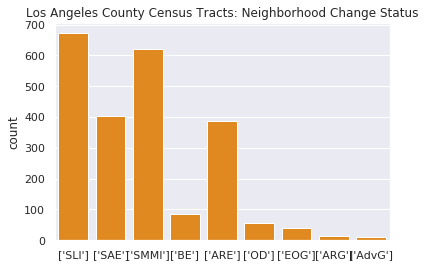

In [8]:
#Chart showing the relative amounts of all typologies across the county:

ax = sns.countplot(data = typologies, x = 'typ_cat', color = 'darkorange')
ax.set_title("Los Angeles County Census Tracts: Neighborhood Change Status")
ax.set_xlabel('')

### Preliminary Findings

This plot demonstrates that many tracts are "stable," or not currently at risk of gentrification, 
displacement, and/or exlcusion (represented as Not Currently at Risk of Gentrification & Stable Moderate-Mixed-Income).

Besides those categories, Stable/Advanced Exlcusion and At Risk of Exclusion are most common.

## 1.2  Merge with Spatial Data & Preliminary Visualization

#### The following Geoplot maps show first a blank outline of the tracts in Los Angeles County, then a choropleth map of their neighborhood change statuses (please refer to the CARTO tinyurl link for a more refined version!). 

As the choropleth map and CARTO map show, overall, the suburban outskirts on all sides of Downtown Los Angeles are dominated by moderate-to-high or mixed-income tracts that are Stable/Advanced Exclusive, indicating their long history of unaffordability for lower-income county residents, along with Stable Moderate/Mixed-Income neighborhoods and some that are at risk of or currently becoming exclusive. Neighborhoods closer to downtown are predominantly classified as Not Currently at Risk of Gentrification, with some experiencing Ongoing Displacement of Low-Income Households and others undergoing Early-Ongoing Gentrification. The pattern of Metro rail and limited-stop bus lines passing from Downtown Los Angeles through lower-income tracts that may be undergoing gentrification or displacement, then through higher-income and/or exclusive tracts toward the ends of the lines, is consistent across the system. 

In [9]:
#Load Los Angeles County Census Tracts from TIGER/LINE

import requests
import geopandas as gpd

#Starting with all California Census Tracts
url = 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_06_tract10.zip'

with open('tl_2010_06_tract10.zip', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)

tracts = gpd.read_file('zip://tl_2010_06_tract10.zip')

#Filter to only include Los Angeles County tracts

los_angeles_tracts = tracts.loc[tracts.COUNTYFP10 == '037']

In [10]:
#Preliminary spatial data exploration in Python:
len(los_angeles_tracts)

2346

In [11]:
los_angeles_tracts.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
5711,06,037,920336,06037920336,9203.36,Census Tract 9203.36,G5020,S,1656848,967,+34.3855971,-118.5358844,"POLYGON ((-118.524107 34.375515, -118.524534 3..."
5712,06,037,920044,06037920044,9200.44,Census Tract 9200.44,G5020,S,972475,27696,+34.4435485,-118.5164043,"POLYGON ((-118.52158 34.442116, -118.521999 34..."
5713,06,037,573003,06037573003,5730.03,Census Tract 5730.03,G5020,S,401153,46959,+33.7943972,-118.2020691,"POLYGON ((-118.201433 33.789846, -118.201732 3..."
5714,06,037,571704,06037571704,5717.04,Census Tract 5717.04,G5020,S,481586,0,+33.8499458,-118.1870723,"POLYGON ((-118.187321 33.845621, -118.187714 3..."
5715,06,037,570403,06037570403,5704.03,Census Tract 5704.03,G5020,S,570677,0,+33.8778668,-118.2044859,"POLYGON ((-118.208134 33.874626, -118.208134 3..."


In [12]:
los_angeles_tracts.describe()

,ALAND10,AWATER10
count,2.346000e+03,2.346000e+03
mean,4.479910e+06,7.651376e+05
std,3.396120e+07,2.355566e+07
min,0.000000e+00,0.000000e+00
25%,5.931080e+05,0.000000e+00
50%,1.013994e+06,0.000000e+00
75%,1.818865e+06,2.769000e+03
max,1.028877e+09,1.098453e+09


In [13]:
#Merge LA County Census Tracts with UDP Typology Data on GEOID (FIPS Code): 

#Adjust GEOID columns to ensure both have leading zeros and matching names

typologies_geoid = typologies['GEOID_x']
typologies_geoid = typologies_geoid.apply(lambda x: '{0:0>11}'.format(x))
typologies['GEOID10'] = typologies_geoid
typologies_geoid.rename(columns = {'GEOID10':'GEOID_x'})

#Execute the merge
typology_maps = pd.merge(los_angeles_tracts, typologies, on = "GEOID10")
typologies.head()

,Unnamed: 0,GEOID_x,pop_17,white_17,hh_17,hinc_17,mhval_17,mhval_17_se,mrent_17,mrent_17_se,...,SMMI,ARG,EOG,OD,OD_loss,SLI,double_counted,typology,typ_cat,GEOID10
0,0,6037101210,6043,2488,2330,34627.0,360600,51082,1174,61,...,0,0,0.0,0,0,1,1.0,1.0,['SLI'],06037101210
1,1,6037102103,1838,1347,689,81477.0,538800,49634,2160,159,...,0,0,0.0,0,0,0,1.0,9.0,['SAE'],06037102103
2,2,6037104105,5887,429,1611,39693.0,288400,47330,731,66,...,0,0,0.0,0,0,1,1.0,1.0,['SLI'],06037104105
3,3,6037104404,3046,33,624,54242.0,349300,20213,1399,115,...,1,0,0.0,0,0,0,1.0,6.0,['SMMI'],06037104404
4,4,6037104810,5806,249,1028,68250.0,345800,17784,1510,233,...,0,0,0.0,0,0,0,1.0,8.0,['BE'],06037104810


In [15]:
#Libraries

import matplotlib.pyplot as plt

#%%capture
!pip install geoplot;
import geoplot

  Using cached https://files.pythonhosted.org/packages/a0/40/40c264002dfba4736f35c3524f6a0e7a03458fb4fcc436ce501f541359b7/geoplot-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c1/95/6a228a25a5e93ae236efe42a36659b61b1b4e7ceee75dd5bc4bab8944c44/contextily-1.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/ae/1f02f68eaa4aa878f184b2adc20a1923becb80a4da6c76efa33450011902/Deprecated-1.2.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/85/68/bc926fe7ff3bbf7b21c00f18e9b803cb828600f35cc5b5b6db1a4fc28d23/mercantile-1.1.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/39/76/7487c1eefeb8f3a0a60b37d74702c63c1b4ea701e8ce16bb7283b7f20a1f/rasterio-1.1.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cc/0e/d27d6e806d6c0d1a2cfdc5d1f088e42339a0a54a09c3343f7f81ec8947ea/snuggs-1.4.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/package

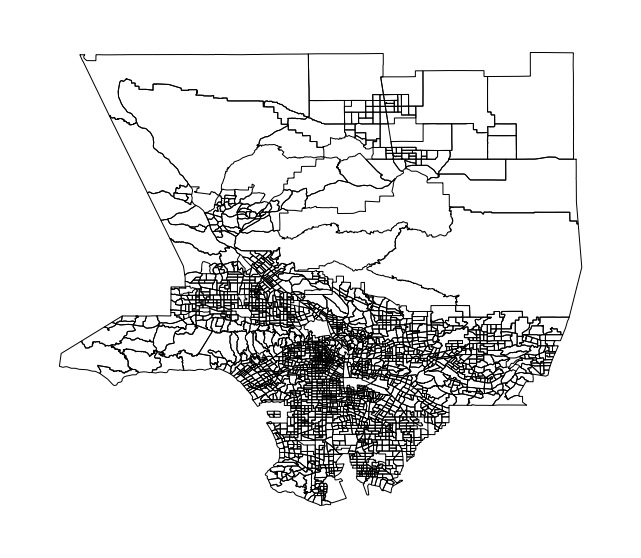

In [16]:
#Basic outline map of tracts in LA County:

geoplot.polyplot(typology_maps, figsize=(14,10))

plt.show()

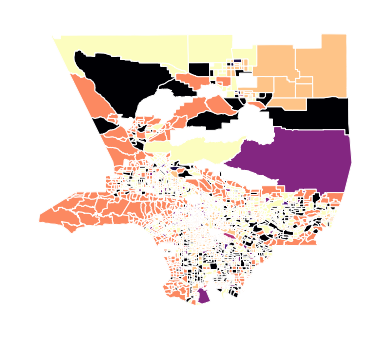

In [17]:
#Choropleth map of displacement typologies across LA County:

ax = geoplot.choropleth(typology_maps, hue = 'typ_cat', cmap = 'magma')

## 1.3  Add Completed Joint Development Sites to the Typology Map

After processing the LEHD datasets showing all jobs held by workers residing in the 0.1-mile radii around completed joint developments, I overlaid my basic outline map with the lat/lon coordinates of the sites for a broad look at where they are located in the context of Los Angeles County. As the CARTO map shows, the majority of these completed projects are clustered in Downtown Los Angeles, Pasadena, and along the Red Line through Hollywood. 

In [18]:
#Load CSV containing lat/lon coordinates of completed JD projects, along with % change in 
#job growth data (to be used in future visualizations)

lehd_data = pd.read_csv('LEHD_coords.csv')

lehd_data.describe()

,Lon,Lat,Total Jobs Percent Change
count,9.000000,9.000000,9.000000
mean,-118.278558,34.087136,8.648889
std,0.056661,0.028207,24.890815
min,-118.326118,34.056314,-0.140000
25%,-118.308833,34.062301,-0.020000
50%,-118.290864,34.095794,0.090000
75%,-118.274689,34.101069,0.960000
max,-118.147938,34.141556,75.000000


In [19]:
lehd_data.head()

,Site,Lon,Lat,Total Jobs Percent Change
0,Del Mar,-118.147938,34.141556,0.10
1,Hollywood Vine Apartments,-118.326118,34.100243,1.92
2,Hollywood Vine Hotel Condos,-118.325789,34.101069,0.96
3,Hollywood Western,-118.308833,34.101460,-0.02
4,Taylor Yard,-118.233774,34.095794,-0.07


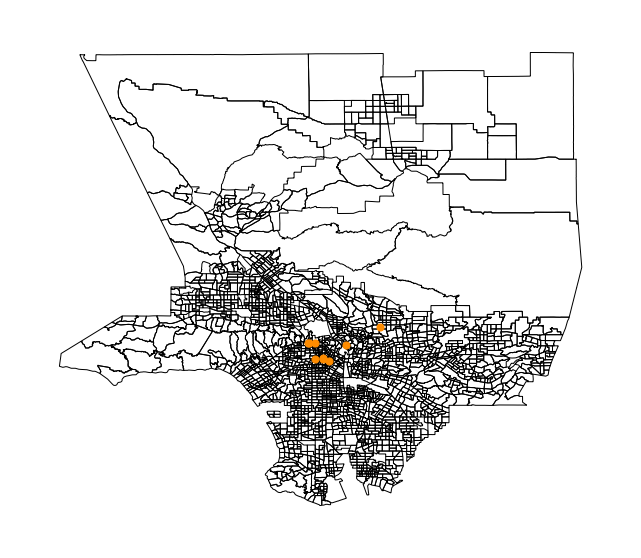

In [20]:
#Plot outline of Los Angeles County tracts with Completed JD Locations

ax = geoplot.polyplot(typology_maps, figsize=(14,10))


lehd = plt.scatter(lehd_data.Lon, lehd_data.Lat, c = 'darkorange', s = 50)

## 1.4 Compare Typologies within Half-Mile Buffers of JD Sites

I used ArcGIS to construct half-mile buffers around each JD site in order to assess the neighborhood change statuses of all Census tracts that fall within these buffer zones. The plot below presents the status of these tracts for a selection of typologies, comparing the tracts surrounding completed, active, and future opportunity JD sites along with the typology statuses of all tracts across LA County. As the plot shows, completed projects (in blue) are more clustered near ongoing gentrification and displacement pressures. On the other hand, the pipeline of active and potential future sites (in orange and green, respectively) are moving more into exclusive neighborhoods.  This trajectory could be a win for mitigating transit-oriented displacement pressures, but it also underscores the importance of exclusive neighborhoods providing their fair share of affordable housing at JD sites. Equitable development advocates in the Los Angeles region are actively working toward policy changes in support of this goal.


In [23]:
#libraries

import numpy as np

In [24]:
#import typology data from half-mile buffers

typology_half_mile_buffers = pd.read_csv('typology_half_mile_buffers.csv')

typology_half_mile_buffers.head()

,Neighborhood Change Status,Completed JD,Active JD,Future Opportunity,LA County
0,Ongoing Displacement,0.119,0.067,0.000,0.024
1,At Risk of Gentrification,0.034,0.000,0.022,0.006
2,Early/Ongoing Gentrification,0.068,0.033,0.000,0.017
3,At Risk of Becoming Exclusive,0.068,0.067,0.022,0.165
4,Becoming Exclusive,0.051,0.100,0.067,0.036


Text(0.5, 1.0, 'Selected Typologies: Half-Mile Buffers Around JD Sites and LA County')

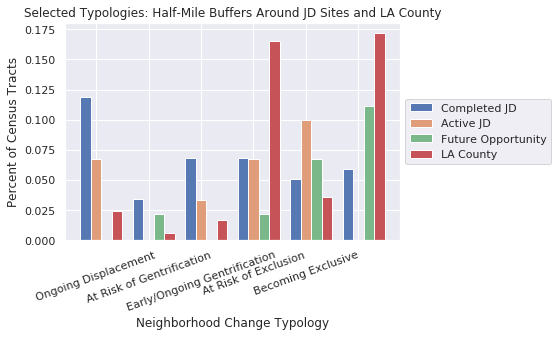

In [25]:
#bar plot of selected typology data

barWidth = 0.2

bars1 = typology_half_mile_buffers['Completed JD']
bars2 = typology_half_mile_buffers['Active JD']
bars3 = typology_half_mile_buffers['Future Opportunity']
bars4 = typology_half_mile_buffers['LA County']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Completed JD')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Active JD')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='Future Opportunity')
plt.bar(r4, bars4, color='#C55357', width=barWidth, edgecolor='white', label='LA County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Ongoing Displacement', 'At Risk of Gentrification', 'Early/Ongoing Gentrification', 'At Risk of Exclusion', 'Becoming Exclusive'], rotation = 20)
plt.xlabel('Neighborhood Change Typology')
plt.ylabel('Percent of Census Tracts')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Selected Typologies: Half-Mile Buffers Around JD Sites and LA County')

# Part II. LEHD Data and Access to Opportunity

I conducted this part of my analysis on a final set of 7 development sites. These completed JD projects were constructed at times that aligned well with the LEHD dataset to enable a comparison of job access from 3 years before construction was completed to 3 years after. In the following sections, I offer a brief description of each JD site to accompany data visualizations, made in Seaborn and Numpy, that demonstrate the job access that these sites have (or haven't) brought to their new residents compared to the surrounding area. I will display each project in a "JD Site Profile," highlighting access to opportunity at each site by comparing a variety of job-holder characteristics in the 0.1-mile radius around the sites, their surrounding Census tracts, and LA County.

## 2.1  Preliminary LEHD Visualizations

#### The first line plot below shows the total number of jobs held by residents of the 0.1-mile buffer zones around each development site. Each line represents total jobs from "Year -3" to "Year 3", with "Year 0" indicating the year when construction was completed. Please note that each development has its own unique 7-year period: "Year -3" is NOT the same year for each site!

This plot shows a variety of job growth patterns. Some sites, like Hollywood/Western and the Wilshire/Vermont Apartments, present a consistent or zigzag pattern of job change that seems unrelated to the JD completion. Most of the others show a discernible spike in job growth after Year 0, suggesting that the new residents of the developments have been able to access job opportunities in the region. In one more extreme example - the Wilshire/Vermont School - the number of jobs spiked from approximately 0 to 152 at Year 3.

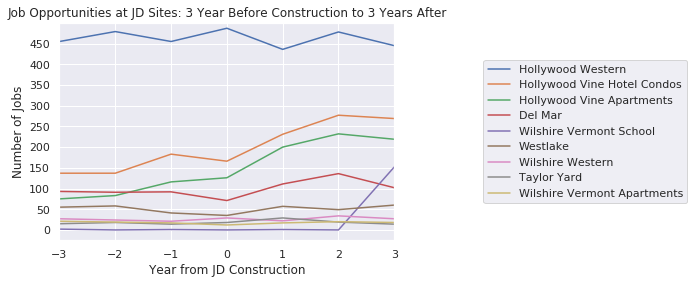

In [26]:
#Line plot of total job growth for residents within 0.1-mile buffer zones of
#completed JD sites: from Year -3 to Year 3

lehd_data_chart = pd.read_csv('LEHD_for_line_chart.csv')

lehd_data_chart.head()

ax = sns.lineplot(x = 'Year', y ='Hollywood Western', data = lehd_data_chart, label = 'Hollywood Western')
ax = sns.lineplot(x = 'Year', y ='Hollywood Vine Hotel Condos', data = lehd_data_chart, label = 'Hollywood Vine Hotel Condos')
ax = sns.lineplot(x = 'Year', y ='Hollywood Vine Apartments', data = lehd_data_chart, label = 'Hollywood Vine Apartments')
ax = sns.lineplot(x = 'Year', y ='Del Mar', data = lehd_data_chart,label = 'Del Mar')
ax = sns.lineplot(x = 'Year', y ='Wilshire Vermont School', data = lehd_data_chart, label = 'Wilshire Vermont School')
ax = sns.lineplot(x = 'Year', y ='Westlake', data = lehd_data_chart, label = 'Westlake')
ax = sns.lineplot(x = 'Year', y ='Wilshire Western', data = lehd_data_chart, label = 'Wilshire Western')
ax = sns.lineplot(x = 'Year', y ='Taylor Yard', data = lehd_data_chart, label = 'Taylor Yard')
ax = sns.lineplot(x = 'Year', y ='Wilshire Vermont Apartments', data = lehd_data_chart, label = 'Wilshire Vermont Apartments')

ax.set_xlim(-3,3)
ax.set_ylim(-25,500)
ax.set_xlabel('Year from JD Construction')
ax.set_ylabel('Number of Jobs')
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
ax.set_title('Job Opportunities at JD Sites: 3 Year Before Construction to 3 Years After')
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

#### The next visualization, a bar plot, shows the total percent change in employment for residents of the 0.1-mile buffer zones from Year -3 to Year +3 for each joint development. Because the Wilshire Vermont School exhibits a sudden 7,500% increase in growth at Year 3, it has been omitted to ensure visibility of all other job growth trends in the plot.

This plot shows that four developments - Del Mar, Hollywood/Vine Apartments, Hollywood/Vine Hotel Condos, and Westlake/Macarthur Park - have demonstrated modest job growth of up to about 2% between Year -3 and Year 3, along with the omitted Wilshire/Vermont School spike in job growth by 7,500%. Three sites have shown very small percent decreases in total jobs, while one exhibited no change over this period. Overall, it appears that completed joint development projects bring more positive change in job access than negative, but the effects are small.

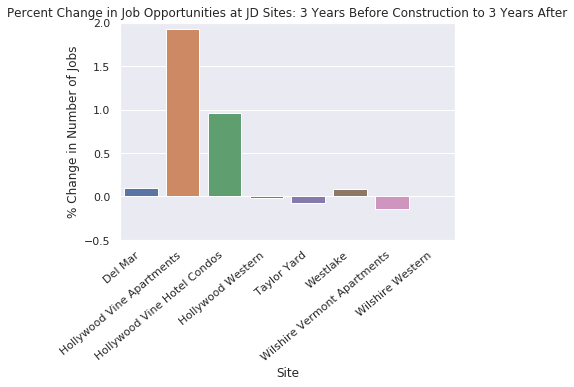

In [27]:
#Bar plot of % change in jobs from Year -3 to Year 3 (excluding Wilshire/Vermont School)

todrop = lehd_data[lehd_data['Site'] == 'Wilshire Vermont School'].index
lehd_no_outlier = lehd_data.drop(todrop)
ax = sns.barplot(x='Site', y = 'Total Jobs Percent Change', data = lehd_no_outlier)

ax.set_title("Percent Change in Job Opportunities at JD Sites: 3 Years Before Construction to 3 Years After")
ax.set_ylim(-0.5,2)
ax.set_xlabel('Site')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('% Change in Number of Jobs')
plt.show()

#### I next turned to LEHD data from the Census tracts encompassing my set of joint developments, and from Los Angeles County as a whole, to broaden the scope of my findings on job access at these sites. The next two plots show job growth trends first for the county on its own, then comparing all relevant tracts.

Between 2004 and 2017, Los Angeles County saw rising employment numbers up until 2007, then plummeted in the aftermath of the mortgage crisis before rebounding steadily between 2012 and 2016.
Many of the Census tracts containing completed joint development sites witnessed employment spikes in 2007, 2009, and 2011, exhibiting a variety of peaks and troughs in job growth over this period.
Please note that I excluded the Westlake/Macarthur Park tract from the second plot; since its job values were significantly lower than the others, with growth from 430 to 620 jobs over this period, omitting it made the visualization clearer.

In [28]:
#Import data from sites, tracts, and the county
tract_county_site = pd.read_csv('LEHD_with_tracts_county.csv')

tract_county_site.head()

,Year,Del Mar,Percent_Del Mar,Hollywood Vine Apartments,Percent_HVA,Hollywood Vine Hotel Condos,Percent_HVHC,Hollywood Western,Percent_HW,Taylor Yard,...,Tract 1871.02,Percent_1871,Tract 2089.02,Percent_2089,Tract 2111.20,Percent_2111,Tract 2118.02,Percent_2118,Los Angeles County,Percent_county
0,2004,93.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1460,0.000000,430,0.000000,1606,0.000000,1463,0.000000,3821482,0.000000
1,2005,91.0,-0.021505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1471,0.007534,372,-0.134884,1571,-0.021793,1463,0.000000,3907255,0.022445
2,2006,92.0,0.010989,NaN,NaN,NaN,NaN,455.0,0.000000,NaN,...,1482,0.007478,418,0.123656,1620,0.031190,1491,0.019139,3959562,0.013387
3,2007,71.0,-0.228261,75.0,0.000000,137.0,0.0,479.0,0.052747,NaN,...,1741,0.174764,437,0.045455,1700,0.049383,1489,-0.001341,4032931,0.018530
4,2008,111.0,0.563380,83.0,0.106667,137.0,0.0,455.0,-0.050104,NaN,...,1489,-0.144744,458,0.048055,1704,0.002353,1565,0.051041,4005299,-0.006852


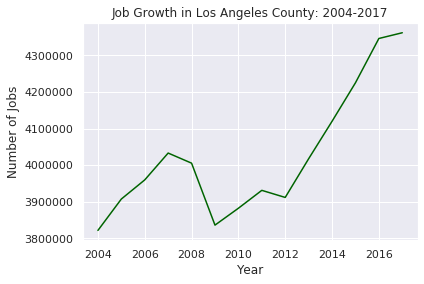

In [29]:
#Total job growth in Los Angeles County as a whole:

ax = sns.lineplot(x = 'Year', y ='Los Angeles County', data = tract_county_site, color = 'darkgreen')


ax.set_title("Job Growth in Los Angeles County: 2004-2017")
ax.set_xlabel('Year')
ax.set_ylabel('Number of Jobs')



plt.show()

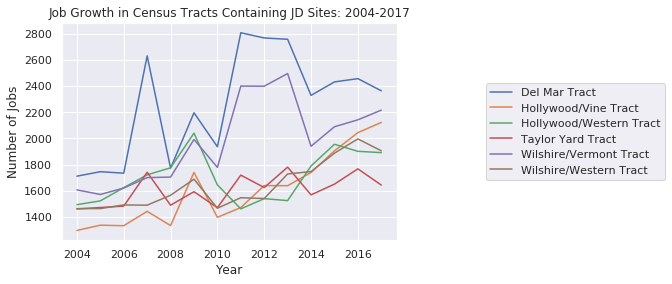

In [30]:
#Comparing tracts containing JD sites (excluding Westlake):

ax = sns.lineplot(x = 'Year', y ='Tract 4636.02', data = tract_county_site, label = "Del Mar Tract")
ax = sns.lineplot(x = 'Year', y ='Tract 1910.00', data = tract_county_site, label = "Hollywood/Vine Tract")
ax = sns.lineplot(x = 'Year', y ='Tract 1905.10', data = tract_county_site, label = "Hollywood/Western Tract")
ax = sns.lineplot(x = 'Year', y ='Tract 1871.02', data = tract_county_site, label = "Taylor Yard Tract")
ax = sns.lineplot(x = 'Year', y ='Tract 2111.20', data = tract_county_site, label = "Wilshire/Vermont Tract")
ax = sns.lineplot(x = 'Year', y ='Tract 2118.02', data = tract_county_site, label = "Wilshire/Western Tract")


ax.set_xlabel('Year')
ax.set_ylabel('Number of Jobs')
ax.set_title('Job Growth in Census Tracts Containing JD Sites: 2004-2017')
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

## 2.2  JD Site Profiles

#### This final series of plots takes one joint development site (or cluster of sites in the same tract) at a time to compare year-over-year change in employment from 3 years before construction was completed to 3 years after, and Year 3 monthly wages, worker race/ethnicity, and worker educational attainment for residents of the 0.1-mile buffer zones around the developments, the surrounding tract, and Los Angeles County. For each comparison, I offer a description of the local context and brief observations on the trends that these plots demonstrate.

In [31]:
#Import LEHD worker characteristic datasets:

#Monthly wages in three categories - $1,250 or less, $1,251-$3,333, and more than $3,333 per month

LEHD_earnings = pd.read_csv('LEHD_earnings.csv')

LEHD_earnings.head()

,Site,Del Mar_2010,H Vine Apartments_2013,H Vine Condos_2013,H Western_2012,Taylor_2017,Westlake_2015,Wilshire VT Apartments_2010,Wilshire VT School_2011,Wilshire Western_2012,...,Tract 2089_2015,Tract 2111_2010,Tract 2111_2011,Tract 2118_2012,LA County_2010,LA County_2011,LA County_2012,LA County_2013,LA County_2015,LA County_2017
0,1250 or less,0.196,0.388,0.394,0.440,0.143,0.233,0.167,0.342,0.296,...,0.294,0.282,0.288,0.290,0.266,0.271,0.270,0.271,0.261,0.237
1,1251 to 3333,0.294,0.265,0.245,0.418,0.357,0.400,0.500,0.388,0.444,...,0.464,0.419,0.404,0.442,0.359,0.353,0.353,0.349,0.343,0.341
2,3333 or more,0.510,0.347,0.361,0.142,0.500,0.367,0.333,0.270,0.259,...,0.241,0.299,0.308,0.268,0.375,0.376,0.378,0.380,0.396,0.422


In [32]:
#Race/ethnicity: These visualizations include White/Caucasian, Black/African-American, and Asian.
# They also show Hispanic/Latinx ethnicity. However, this dataset did not offer ethnicity by race,
# meaning that there will be some overlap between Hispanic/Latinx ethnicity and the racial categories shown.

LEHD_race = pd.read_csv('LEHD_race.csv')

LEHD_race.head()

,Site,Del Mar_2010,H Vine Apartments_2013,H Vine Condos_2013,H Western_2012,Taylor_2017,Westlake_2015,Wilshire VT Apartments_2010,Wilshire VT School_2011,Wilshire Western_2012,...,Tract 2089_2015,Tract 2111_2010,Tract 2111_2011,Tract 2118_2012,LA County_2010,LA County_2011,LA County_2012,LA County_2013,LA County_2015,LA County_2017
0,White,0.716,0.840,0.829,0.852,0.500,0.183,0.500,0.217,0.556,...,0.740,0.370,0.459,0.460,0.708,0.711,0.714,0.716,0.721,0.706
1,Black/African-American,0.098,0.068,0.078,0.052,0.000,0.000,0.111,0.099,0.000,...,0.073,0.086,0.118,0.097,0.096,0.096,0.096,0.096,0.097,0.093
2,Asian,0.137,0.082,0.071,0.079,0.500,0.817,0.389,0.645,0.370,...,0.131,0.508,0.396,0.403,0.158,0.157,0.155,0.152,0.146,0.159
3,Hispanic/Latino,0.382,0.105,0.156,0.391,0.429,0.117,0.444,0.092,0.593,...,0.546,0.263,0.240,0.301,0.381,0.379,0.380,0.380,0.378,0.415


In [33]:
# Educational attainment: some high school, high school diploma, some college, and a bachelors or advanced degree

LEHD_education = pd.read_csv('LEHD_education.csv')

LEHD_education.head()

,Site,Del Mar_2010,H Vine Apartments_2013,H Vine Condos_2013,H Western_2012,Taylor_2017,Westlake_2015,Wilshire VT Apartments_2010,Wilshire VT School_2011,Wilshire Western_2012,...,Tract 2089_2015,Tract 2111_2010,Tract 2111_2011,Tract 2118_2012,LA County_2010,LA County_2011,LA County_2012,LA County_2013,LA County_2015,LA County_2017
0,Less than high school,0.118,0.087,0.089,0.213,0.429,0.083,0.167,0.125,0.259,...,0.201,0.147,0.140,0.145,0.156,0.156,0.159,0.160,0.161,0.162
1,"High school or equivalent, no college",0.098,0.160,0.167,0.155,0.143,0.150,0.167,0.151,0.111,...,0.173,0.149,0.155,0.158,0.147,0.149,0.154,0.157,0.162,0.158
2,Some college or Associate degree,0.196,0.228,0.234,0.187,0.143,0.350,0.222,0.230,0.148,...,0.180,0.197,0.213,0.211,0.222,0.224,0.229,0.229,0.230,0.225
3,Bachelor's degree or advanced degree,0.363,0.283,0.268,0.153,0.143,0.250,0.167,0.270,0.185,...,0.143,0.282,0.228,0.271,0.243,0.242,0.242,0.240,0.232,0.230


### JD Site Profile #1: Del Mar

Del Mar is a joint development that includes 347 apartments (21 affordable), 11,000 sq. ft. of retail space, and 600 dedicated transit parking spaces. It is located along the Gold Line in Pasadena and was completed in 2007. Over the period shown, the site witnessed growth in employment in 2008, even as jobs plummeted at the tract level. Monthly wages for workers living in this site area tend to be higher than in the county as a whole, but not as high as in the surrounding Census tract. Resident race and ethnicity are comparable to LA County demographics, with a substantially higher Latinx population than in the surrounding tract. The share of workers living at this site and in its surrounding tract with a bachelor's or advanced degree is higher than that of the county.

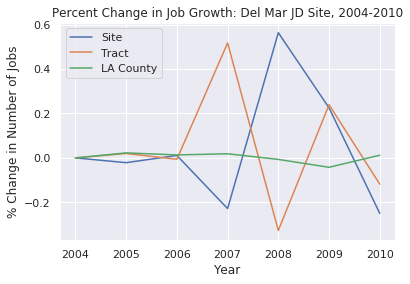

In [34]:
# Change in Employment

DelMar_data = tract_county_site.loc[tract_county_site.Year < 2011]
DelMar_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_Del Mar', data = DelMar_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_4636', data = DelMar_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = DelMar_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Del Mar JD Site, 2004-2010')
plt.show()

Text(0.5, 1.0, 'Monthly Wages: Del Mar Site, 2010')

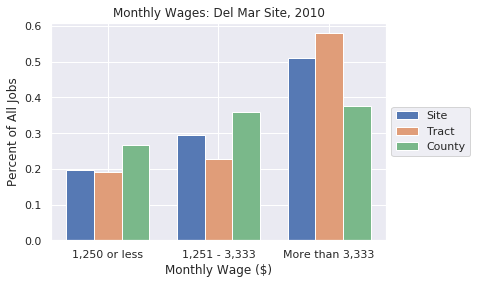

In [35]:
# Monthly Earnings

barWidth = 0.25

bars1 = LEHD_earnings['Del Mar_2010']
bars2 = LEHD_earnings['Tract 4636_2010']
bars3 = LEHD_earnings['LA County_2010']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['1,250 or less', '1,251 - 3,333', 'More than 3,333'])
plt.xlabel('Monthly Wage ($)')
plt.ylabel('Percent of All Jobs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Monthly Wages: Del Mar Site, 2010')

Text(0.5, 1.0, 'Race/Ethnicity: Del Mar Site, 2010')

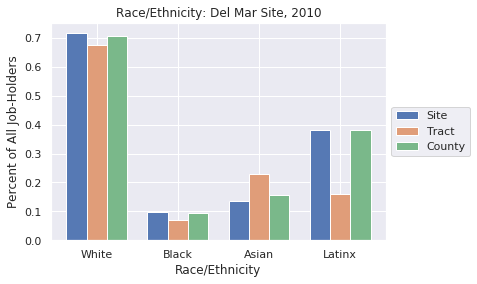

In [36]:
# Worker Race/Ethnicity

barWidth = 0.25

bars1 = LEHD_race['Del Mar_2010']
bars2 = LEHD_race['Tract 4636_2010']
bars3 = LEHD_race['LA County_2010']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['White', 'Black', 'Asian', 'Latinx'])
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Race/Ethnicity: Del Mar Site, 2010')

Text(0.5, 1.0, 'Educational Attainment: Del Mar Site, 2010')

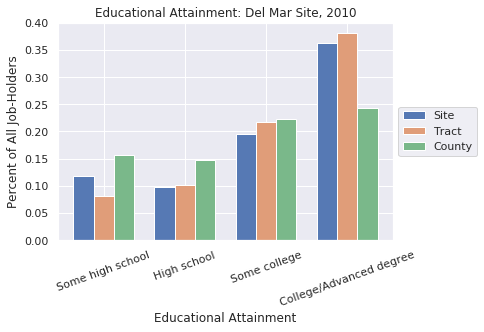

In [37]:
# Worker Educational Attainment

barWidth = 0.25

bars1 = LEHD_education['Del Mar_2010']
bars2 = LEHD_education['Tract 4636_2010']
bars3 = LEHD_education['LA County_2010']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Some high school', 'High school', 'Some college', 'College/Advanced degree'], rotation = 20)
plt.xlabel('Educational Attainment')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Educational Attainment: Del Mar Site, 2010')

### JD Site Profile #2: Hollywood/Vine

The Hollywood/Vine location includes two development sites: the Hollywood/Vine Apartments, which include 375 apartments (78 affordable) and 28,000 sq. ft. of retail space, and the Hollywood/Vine Hotel Condos, including a 305-room Hotel, 143 condominiums, 31,000 sq. ft. of retail space, an improved public plaza and second subway elevator, and a new subway portal canopy and bike room. Both were completed in 2010. They show similar patterns of job growth and decline to the tract encompassing them. Monthly earnings are concentrated in the lowest and highest wage categories, with a smaller share of earners in the middle. The population of workers residing at these sites is disproportionately white, with relatively few people of color compared to the tract and county. Levels of educational attainment are also disproportionately high for workers living at Hollywood/Vine.

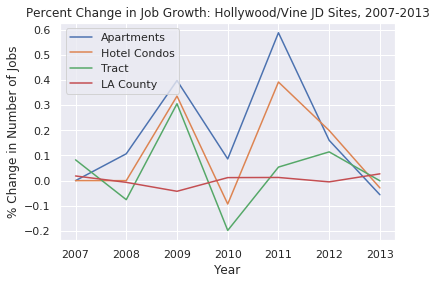

In [38]:
# Change in Employment

HV_data = tract_county_site.loc[(tract_county_site.Year > 2006) & (tract_county_site.Year < 2014)]
HV_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_HVA', data = HV_data, label = "Apartments")
ax = sns.lineplot(x = 'Year', y ='Percent_HVHC', data = HV_data, label = "Hotel Condos")
ax = sns.lineplot(x = 'Year', y ='Percent_1910', data = HV_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = HV_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Hollywood/Vine JD Sites, 2007-2013')
plt.show()

Text(0.5, 1.0, 'Monthly Wages: Hollywood/Vine Site, 2013')

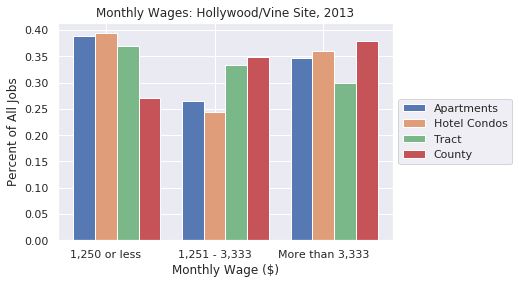

In [39]:
# Monthly Earnings

barWidth = 0.2

bars1 = LEHD_earnings['H Vine Apartments_2013']
bars2 = LEHD_earnings['H Vine Condos_2013']
bars3 = LEHD_earnings['Tract 1910_2013']
bars4 = LEHD_earnings['LA County_2013']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Apartments')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Hotel Condos')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r4, bars4, color='#C55357', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['1,250 or less', '1,251 - 3,333', 'More than 3,333'])
plt.xlabel('Monthly Wage ($)')
plt.ylabel('Percent of All Jobs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Monthly Wages: Hollywood/Vine Site, 2013')

Text(0.5, 1.0, 'Race/Ethnicity: Hollywood/Vine Site, 2013')

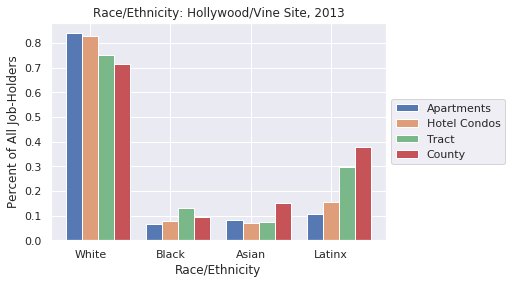

In [40]:
# Worker Race/Ethnicity

barWidth = 0.2

bars1 = LEHD_race['H Vine Apartments_2013']
bars2 = LEHD_race['H Vine Condos_2013']
bars3 = LEHD_race['Tract 1910_2013']
bars4 = LEHD_race['LA County_2013']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Apartments')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Hotel Condos')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r4, bars4, color='#C55357', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['White', 'Black', 'Asian', 'Latinx'])
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Race/Ethnicity: Hollywood/Vine Site, 2013')

Text(0.5, 1.0, 'Educational Attainment: Hollywood/Vine Site, 2013')

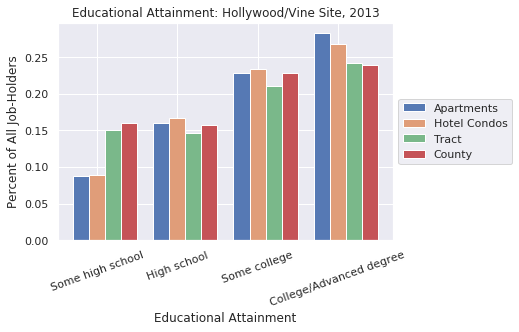

In [41]:
# Worker Educational Attainment

barWidth = 0.2

bars1 = LEHD_education['H Vine Apartments_2013']
bars2 = LEHD_education['H Vine Condos_2013']
bars3 = LEHD_education['Tract 1910_2013']
bars4 = LEHD_education['LA County_2013']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Apartments')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Hotel Condos')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r4, bars4, color='#C55357', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Some high school', 'High school', 'Some college', 'College/Advanced degree'], rotation = 20)
plt.xlabel('Educational Attainment')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Educational Attainment: Hollywood/Vine Site, 2013')

### JD Site Profile #3: Hollywood/Western

The Hollywood/Western development, located near its Hollywood/Vine counterparts along the Red Line, offers 60 affordable apartments, 9,000 sq. ft. of retail space, and a 4,000 sq. ft. childcare facility and was completed in 2009. It also experienced similar employment trends to its surrounding Census tract. Wages at this site are disproportionately low compared with both the tract and county, with the plurality of workers living here making less than $1,250 per month. Workers living here are disproportionately white and Latinx. Educational attainment is also disproportionately low, with over 20% of workers having not attained a high school diploma.

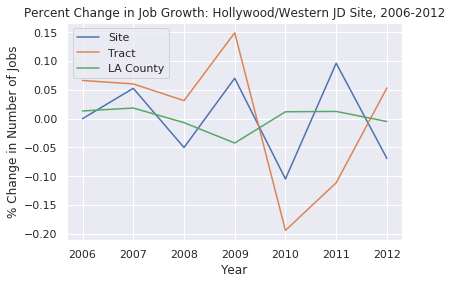

In [42]:
# Change in Employment

HW_data = tract_county_site.loc[(tract_county_site.Year > 2005) & (tract_county_site.Year < 2013)]
HW_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_HW', data = HW_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_1905', data = HW_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = HW_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Hollywood/Western JD Site, 2006-2012')
plt.show()

Text(0.5, 1.0, 'Monthly Wages: Hollywood/Western Site, 2012')

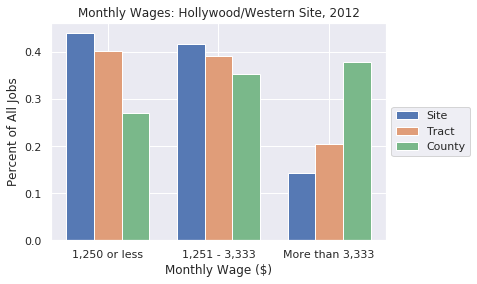

In [43]:
# Monthly Earnings

barWidth = 0.25

bars1 = LEHD_earnings['H Western_2012']
bars2 = LEHD_earnings['Tract 1905_2012']
bars3 = LEHD_earnings['LA County_2012']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['1,250 or less', '1,251 - 3,333', 'More than 3,333'])
plt.xlabel('Monthly Wage ($)')
plt.ylabel('Percent of All Jobs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Monthly Wages: Hollywood/Western Site, 2012')

Text(0.5, 1.0, 'Race/Ethnicity: Hollywood/Western Site, 2012')

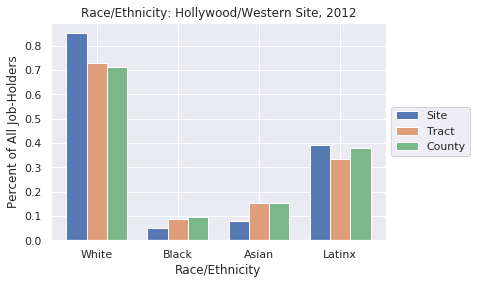

In [44]:
# Worker Race/Ethnicity

barWidth = 0.25

bars1 = LEHD_race['H Western_2012']
bars2 = LEHD_race['Tract 1905_2012']
bars3 = LEHD_race['LA County_2012']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['White', 'Black', 'Asian', 'Latinx'])
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Race/Ethnicity: Hollywood/Western Site, 2012')

Text(0.5, 1.0, 'Educational Attainment: Hollywood/Western Site, 2012')

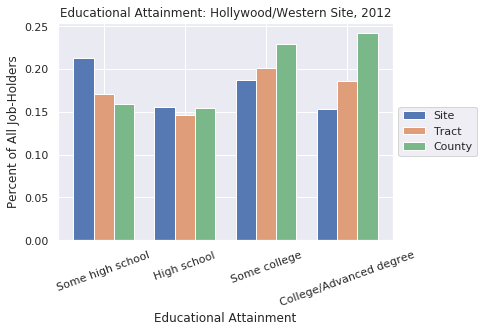

In [45]:
# Worker Educational Attainment

barWidth = 0.25

bars1 = LEHD_education['H Western_2012']
bars2 = LEHD_education['Tract 1905_2012']
bars3 = LEHD_education['LA County_2012']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Some high school', 'High school', 'Some college', 'College/Advanced degree'], rotation = 20)
plt.xlabel('Educational Attainment')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Educational Attainment: Hollywood/Western Site, 2012')

### JD Site Profile #4: Taylor Yard

The Taylor Yard site includes multiple completed developments. For this plot, they have been consolidated here as one site since they are all located directly next to one another in the same Census tract, and only Lots 1 and 3 are shown since data limitations prevent analysis of those that were completed most recently. Lots 1 and 3 collectively offer 156 affordable apartments for families and were both completed in 2014. Compared with their surrounding tract, the site witnessed steady growth between 2013 and 2015 with a sharp decline in 2016. Wages for workers living at Taylor Yard are higher than in the tract and county, with half of workers at the site earning at the highest LEHD bracket. Half of the worker population here identify as Asian - much higher than the share of Asians in the tract and county - while the white population is disproportionately low. Despite relatively high wages at the site, the plurality of workers living at Taylor Yard have not attained a high school diploma.

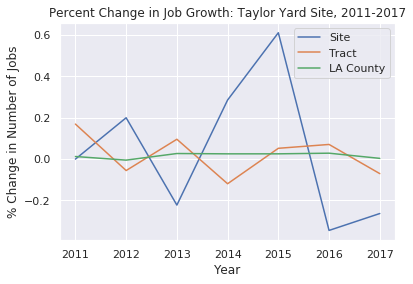

In [46]:
# Change in Employment

Taylor_data = tract_county_site.loc[(tract_county_site.Year > 2010) & (tract_county_site.Year < 2018)]
Taylor_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_Taylor', data = Taylor_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_1871', data = Taylor_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = Taylor_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Taylor Yard Site, 2011-2017')
plt.show()

Text(0.5, 1.0, 'Monthly Wages: Taylor Yard Site, 2017')

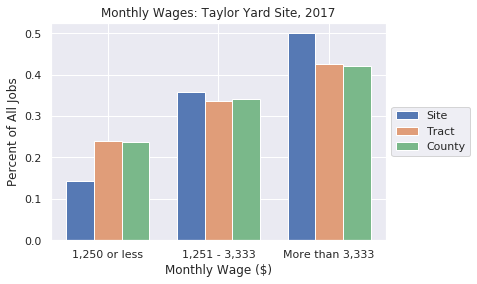

In [47]:
# Monthly Earnings

barWidth = 0.25

bars1 = LEHD_earnings['Taylor_2017']
bars2 = LEHD_earnings['Tract 1871_2017']
bars3 = LEHD_earnings['LA County_2017']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['1,250 or less', '1,251 - 3,333', 'More than 3,333'])
plt.xlabel('Monthly Wage ($)')
plt.ylabel('Percent of All Jobs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Monthly Wages: Taylor Yard Site, 2017')

Text(0.5, 1.0, 'Race/Ethnicity: Taylor Yard Site, 2017')

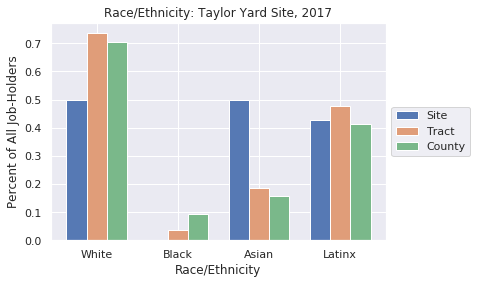

In [48]:
# Worker Race/Ethnicity

barWidth = 0.25

bars1 = LEHD_race['Taylor_2017']
bars2 = LEHD_race['Tract 1871_2017']
bars3 = LEHD_race['LA County_2017']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['White', 'Black', 'Asian', 'Latinx'])
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Race/Ethnicity: Taylor Yard Site, 2017')

Text(0.5, 1.0, 'Educational Attainment: Taylor Yard Site, 2017')

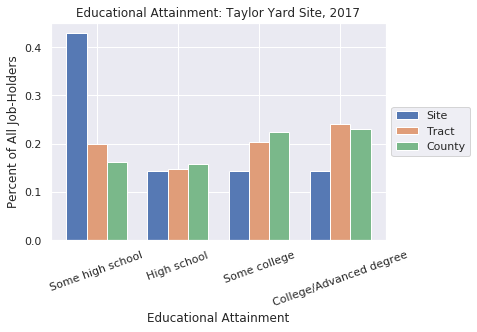

In [49]:
# Worker Educational Attainment

barWidth = 0.25

bars1 = LEHD_education['Taylor_2017']
bars2 = LEHD_education['Tract 1871_2017']
bars3 = LEHD_education['LA County_2017']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Some high school', 'High school', 'Some college', 'College/Advanced degree'], rotation = 20)
plt.xlabel('Educational Attainment')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Educational Attainment: Taylor Yard Site, 2017')

### JD Site Profile #5: Westlake/Macarthur Park

The Westlake/Macarthur Park development, located along the Red Line, includes 90 affordable apartments, 15,540 sq. ft. of retail space, and 100 dedicated transit parking spaces for "commute period" only and was completed in 2012. It experienced substantial job growth between 2012 and 2013, with a sharp decline in the following year. Wages for workers living at this site are fairly comparable with those of LA County and trend slightly higher than the surrounding Census tract. Over 80% of workers living here are Asian, with very little representation of other racial/ethnic groups. A disproportionate amount have attained either some college, a bachelor's degree, or an advanced degree.

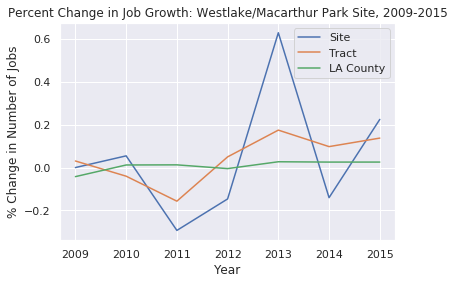

In [50]:
#Change in Employment

Westlake_data = tract_county_site.loc[(tract_county_site.Year > 2008) & (tract_county_site.Year < 2016)]
Westlake_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_Westlake', data = Westlake_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_2089', data = Westlake_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = Westlake_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Westlake/Macarthur Park Site, 2009-2015')
plt.show()

Text(0.5, 1.0, 'Monthly Wages: Westlake/Macarthur Park Site, 2015')

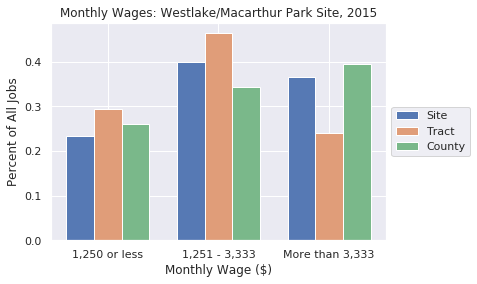

In [51]:
# Monthly Earnings

barWidth = 0.25

bars1 = LEHD_earnings['Westlake_2015']
bars2 = LEHD_earnings['Tract 2089_2015']
bars3 = LEHD_earnings['LA County_2015']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['1,250 or less', '1,251 - 3,333', 'More than 3,333'])
plt.xlabel('Monthly Wage ($)')
plt.ylabel('Percent of All Jobs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Monthly Wages: Westlake/Macarthur Park Site, 2015')

Text(0.5, 1.0, 'Race/Ethnicity: Westlake/Macarthur Park Site, 2015')

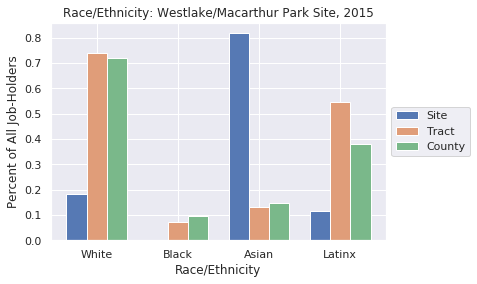

In [52]:
# Worker Race/Ethnicity

barWidth = 0.25

bars1 = LEHD_race['Westlake_2015']
bars2 = LEHD_race['Tract 2089_2015']
bars3 = LEHD_race['LA County_2015']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['White', 'Black', 'Asian', 'Latinx'])
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Race/Ethnicity: Westlake/Macarthur Park Site, 2015')

Text(0.5, 1.0, 'Educational Attainment: Westlake/Macarthur Park Site, 2015')

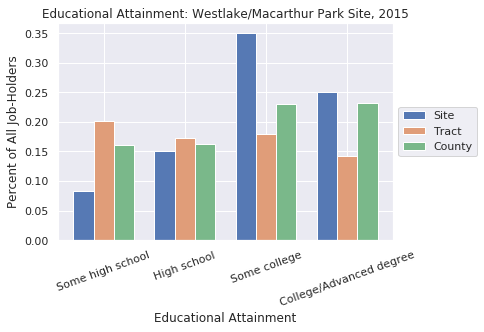

In [53]:
# Worker Educational Attainment

barWidth = 0.25

bars1 = LEHD_education['Westlake_2015']
bars2 = LEHD_education['Tract 2089_2015']
bars3 = LEHD_education['LA County_2015']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Some high school', 'High school', 'Some college', 'College/Advanced degree'], rotation = 20)
plt.xlabel('Educational Attainment')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Educational Attainment: Westlake/Macarthur Park Site, 2015')

### JD Site Profile #6: Wilshire/Vermont

The Wilshire/Vermont development includes both apartments and a school. Data from the school is excluded from the change in employment visualization, due to its sharp spike from 0 jobs to 152 that made percent change calculations difficult to demonstrate in the plot. Both the apartments and the school are shown in the subsequent visualizations of earnings, race/ethnicity, and educational attainment, depicted separately since they were completed at different times.

The Wilshire/Vermont Apartments, at the intersection of the Red and Purple Lines, offer 449 apartments (90 affordable) and 36,000 sq. ft. of retail space and were completed in 2007. They experienced a spike in growth in 2008 while employment declined at the tract level. The nearby Wilshire/Vermont School is an 800-student middle school that was completed in 2008. 

For workers living at the apartments, wages are more concentrated in the middle LEHD income category than they are at the tract or county level. Compared with larger geographies, this worker population has a larger share of Black and Latinx residents. Educational attainment is fairly comparable to the tract and county levels, though slightly lower for attainment of a bachelor's or advanced degree.

For workers living near the school site, the plurality are earning at LEHD's middle income category. The population is disproportionately Asian, and they have disproportionately high educational attainment. These stark differences are particularly interesting to observe given how close the two developments are to one another.

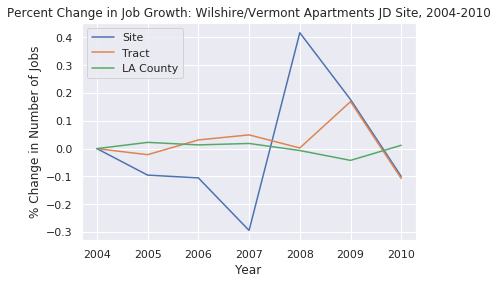

In [54]:
# Change in Employment (apartments only)

WV_data = tract_county_site.loc[(tract_county_site.Year > 2003) & (tract_county_site.Year < 2011)]
WV_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_WVA', data = WV_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_2111', data = WV_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = WV_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Wilshire/Vermont Apartments JD Site, 2004-2010')
plt.show()

Text(0.5, 1.0, 'Monthly Wages: Wilshire/Vermont Apartments, 2010')

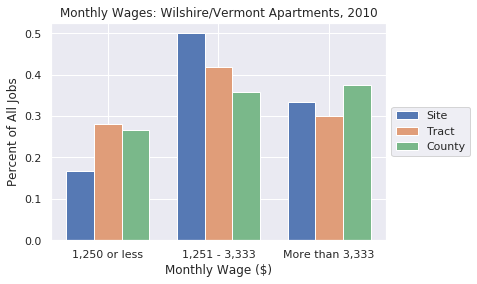

In [55]:
# Monthly Earnings - Apartments

barWidth = 0.25

bars1 = LEHD_earnings['Wilshire VT Apartments_2010']
bars2 = LEHD_earnings['Tract 2111_2010']
bars3 = LEHD_earnings['LA County_2010']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['1,250 or less', '1,251 - 3,333', 'More than 3,333'])
plt.xlabel('Monthly Wage ($)')
plt.ylabel('Percent of All Jobs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Monthly Wages: Wilshire/Vermont Apartments, 2010')

Text(0.5, 1.0, 'Monthly Wages: Wilshire/Vermont School, 2011')

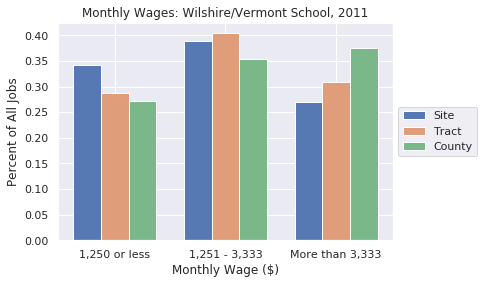

In [56]:
# Monthly Earnings - School

barWidth = 0.25

bars1 = LEHD_earnings['Wilshire VT School_2011']
bars2 = LEHD_earnings['Tract 2111_2011']
bars3 = LEHD_earnings['LA County_2011']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['1,250 or less', '1,251 - 3,333', 'More than 3,333'])
plt.xlabel('Monthly Wage ($)')
plt.ylabel('Percent of All Jobs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Monthly Wages: Wilshire/Vermont School, 2011')

Text(0.5, 1.0, 'Race/Ethnicity: Wilshire/Vermont Apartments, 2010')

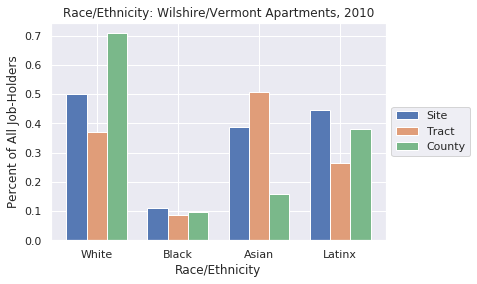

In [57]:
# Worker Race/Ethnicity - Apartments

barWidth = 0.25

bars1 = LEHD_race['Wilshire VT Apartments_2010']
bars2 = LEHD_race['Tract 2111_2010']
bars3 = LEHD_race['LA County_2010']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['White', 'Black', 'Asian', 'Latinx'])
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Race/Ethnicity: Wilshire/Vermont Apartments, 2010')

Text(0.5, 1.0, 'Race/Ethnicity: Wilshire/Vermont School, 2011')

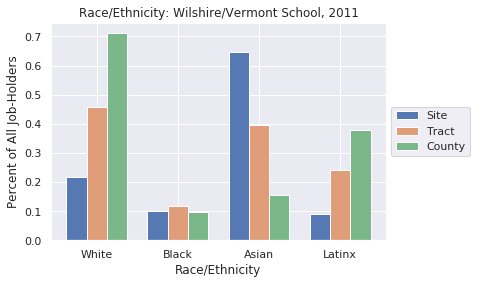

In [58]:
# Worker Race/Ethnicity - School

barWidth = 0.25

bars1 = LEHD_race['Wilshire VT School_2011']
bars2 = LEHD_race['Tract 2111_2011']
bars3 = LEHD_race['LA County_2011']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['White', 'Black', 'Asian', 'Latinx'])
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Race/Ethnicity: Wilshire/Vermont School, 2011')

Text(0.5, 1.0, 'Educational Attainment: Wilshire/Vermont Apartments, 2010')

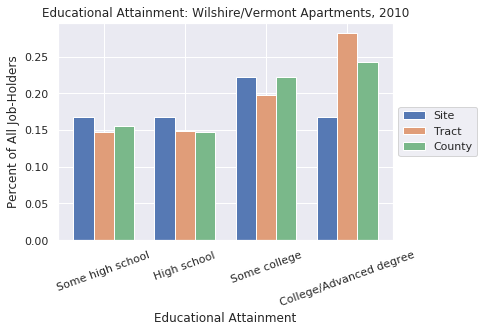

In [59]:
# Worker Educational Attainment - Apartments

barWidth = 0.25

bars1 = LEHD_education['Wilshire VT Apartments_2010']
bars2 = LEHD_education['Tract 2111_2010']
bars3 = LEHD_education['LA County_2010']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Some high school', 'High school', 'Some college', 'College/Advanced degree'], rotation = 20)
plt.xlabel('Educational Attainment')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Educational Attainment: Wilshire/Vermont Apartments, 2010')

Text(0.5, 1.0, 'Educational Attainment: Wilshire/Vermont School, 2011')

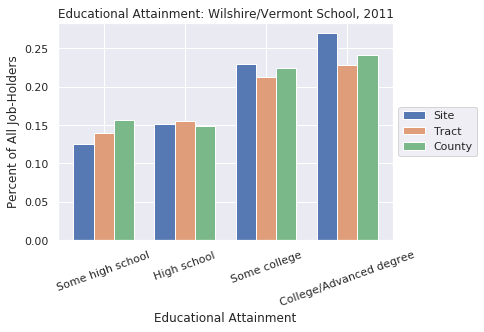

In [60]:
# Worker Educational Attainment - School

barWidth = 0.25

bars1 = LEHD_education['Wilshire VT School_2011']
bars2 = LEHD_education['Tract 2111_2011']
bars3 = LEHD_education['LA County_2011']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Some high school', 'High school', 'Some college', 'College/Advanced degree'], rotation = 20)
plt.xlabel('Educational Attainment')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Educational Attainment: Wilshire/Vermont School, 2011')

### JD Site Profile #7: Wilshire/Western

And finally, the Wishire/Western joint development on the Purple Line includes 186 condominiums, 41,000 sq. ft. of retail space, and a new bus layover facility and subway portal canopy. It was completed in 2009. Its employment patterns roughly mirror those of its surrounding tract, with growth spikes in 2009 and 2011. Wages for workers living here are also comparable to those of the surrounding tract. This population is disproportionately Latinx, and workers are disproportionately likely not to have attained a high school diploma.

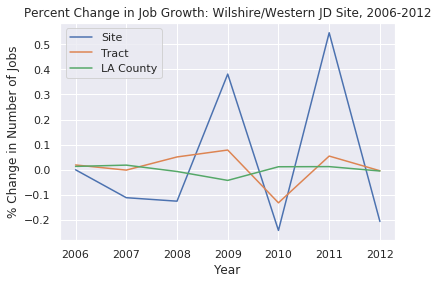

In [61]:
# Change in Employment

WW_data = tract_county_site.loc[(tract_county_site.Year > 2005) & (tract_county_site.Year < 2013)]
WW_data.tail()

ax = sns.lineplot(x = 'Year', y ='Percent_WW', data = WW_data, label = "Site")
ax = sns.lineplot(x = 'Year', y ='Percent_2118', data = WW_data, label = "Tract")
ax = sns.lineplot(x = 'Year', y ='Percent_county', data = WW_data, label = "LA County")


ax.set_xlabel('Year')
ax.set_ylabel('% Change in Number of Jobs')
ax.set_title('Percent Change in Job Growth: Wilshire/Western JD Site, 2006-2012')
plt.show()

Text(0.5, 1.0, 'Monthly Wages: Wilshire/Western Site, 2012')

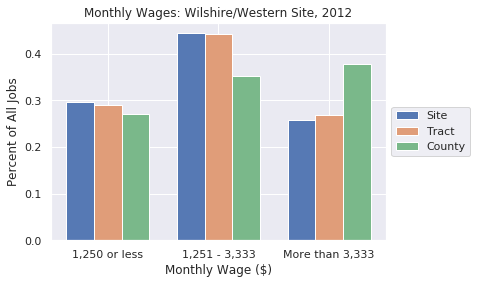

In [62]:
# Monthly Earnings

barWidth = 0.25

bars1 = LEHD_earnings['Wilshire Western_2012']
bars2 = LEHD_earnings['Tract 2118_2012']
bars3 = LEHD_earnings['LA County_2012']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['1,250 or less', '1,251 - 3,333', 'More than 3,333'])
plt.xlabel('Monthly Wage ($)')
plt.ylabel('Percent of All Jobs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Monthly Wages: Wilshire/Western Site, 2012')

Text(0.5, 1.0, 'Race/Ethnicity: Wilshire/Western Site, 2012')

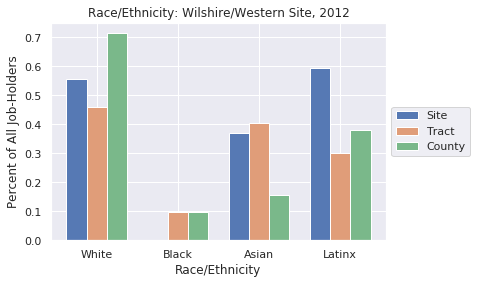

In [63]:
# Worker Race/Ethnicity

barWidth = 0.25

bars1 = LEHD_race['Wilshire Western_2012']
bars2 = LEHD_race['Tract 2118_2012']
bars3 = LEHD_race['LA County_2012']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['White', 'Black', 'Asian', 'Latinx'])
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Race/Ethnicity: Wilshire/Western Site, 2012')

Text(0.5, 1.0, 'Educational Attainment: Wilshire/Western Site, 2012')

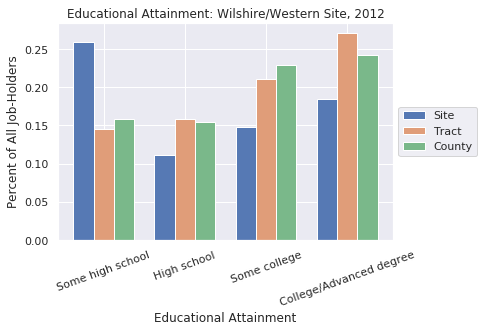

In [64]:
# Worker Educational Attainment

barWidth = 0.25

bars1 = LEHD_education['Wilshire Western_2012']
bars2 = LEHD_education['Tract 2118_2012']
bars3 = LEHD_education['LA County_2012']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='#5679B4', width=barWidth, edgecolor='white', label='Site')
plt.bar(r2, bars2, color='#E09D79', width=barWidth, edgecolor='white', label='Tract')
plt.bar(r3, bars3, color='#7AB88A', width=barWidth, edgecolor='white', label='County')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Some high school', 'High school', 'Some college', 'College/Advanced degree'], rotation = 20)
plt.xlabel('Educational Attainment')
plt.ylabel('Percent of All Job-Holders')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Educational Attainment: Wilshire/Western Site, 2012')

#### These findings present a diverse picture of worker populations living at completed JD sites.
While some of these sites demonstrate year-over-year employment growth and decline that mirrors the patterns of their surrounding Census tracts and counties, others diverge from these patterns even during the 2008 Recession. Likewise, some display unique characteristics of monthly earnings and demographic characteristics while others remain more consistent with larger geographies. While these sample sizes are small, they offer an important starting point for further research on the ways in which joint developments offer a home to particular populations of residents who go on to access jobs in the Los Angeles region from these sites.